# Import danych. Inżynieria cech

In [594]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [596]:
df = pd.read_csv('/Users/paulinarejda/Desktop/SGH/praca_II/application_record.csv')
df2 = pd.read_csv('/Users/paulinarejda/Desktop/SGH/praca_II/credit_record.csv')

In [597]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [598]:
# pozbywamy się wielkich liter z nazw kolumn
df.columns = map(str.lower, df.columns)
df2.columns = map(str.lower, df2.columns)

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [600]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [601]:
# sprawdzamy braki
df.isnull().any()

id                     False
code_gender            False
flag_own_car           False
flag_own_realty        False
cnt_children           False
amt_income_total       False
name_income_type       False
name_education_type    False
name_family_status     False
name_housing_type      False
days_birth             False
days_employed          False
flag_mobil             False
flag_work_phone        False
flag_phone             False
flag_email             False
occupation_type         True
cnt_fam_members        False
dtype: bool

In [602]:
df2.isnull().any()

id                False
months_balance    False
status            False
dtype: bool

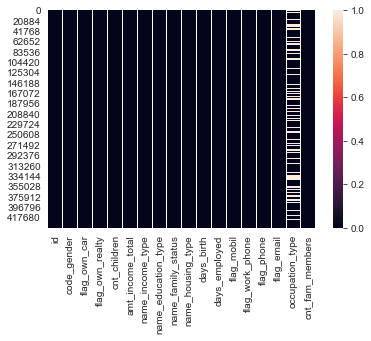

In [603]:
# wizualizacja braków
sns.heatmap(df.isnull())

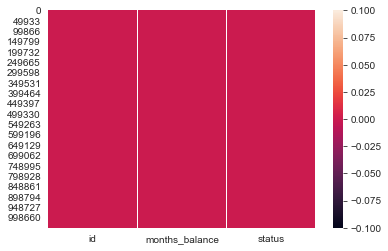

In [604]:
sns.heatmap(df2.isnull())

In [605]:
# usuwamy zmienną occupation_type ze względu na dużą liczbę braków
df.drop('occupation_type', axis=1, inplace=True) 

In [606]:
# sprawdzamy, czy występują duplikaty w ramach zmiennej ID i, jeśli tak, usuwamy je
df['id'].duplicated().any()

True

In [607]:
# usuwamy duplikaty
df = df.drop_duplicates('id', keep='last') 

In [608]:
# sprawdzamy wartości zmiennej flag_mobil
df.flag_mobil.unique()
# usuwamy zmienną, bo dla wszystkich obserwacji przyjmuje taką samą wartość 
del df['flag_mobil']

In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438510 non-null  int64  
 1   code_gender          438510 non-null  object 
 2   flag_own_car         438510 non-null  object 
 3   flag_own_realty      438510 non-null  object 
 4   cnt_children         438510 non-null  int64  
 5   amt_income_total     438510 non-null  float64
 6   name_income_type     438510 non-null  object 
 7   name_education_type  438510 non-null  object 
 8   name_family_status   438510 non-null  object 
 9   name_housing_type    438510 non-null  object 
 10  days_birth           438510 non-null  int64  
 11  days_employed        438510 non-null  int64  
 12  flag_work_phone      438510 non-null  int64  
 13  flag_phone           438510 non-null  int64  
 14  flag_email           438510 non-null  int64  
 15  cnt_fam_members  

In [610]:
# usunięcie obserwacji odstających
    # czy powinnam zostawić zmienną WIEK i nie usuwać w jej przypadku obs. odstających?
# df
z_scores = stats.zscore(df[['cnt_children', 'amt_income_total', 'cnt_fam_members', 'days_birth', 'days_employed']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [611]:
# df2
z_scores = stats.zscore(df2[['months_balance']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df2 = df2[filtered_entries]

In [612]:
# days_birth i days_employed to liczba dni od narodzin/daty rozpoczęcia pracy
 # zmieniamy znak w days_birth i dzielimy przez 365

# wiek
df['age'] = (-df['days_birth'] / 365.25).round()
df = df.drop('days_birth', axis=1)

In [613]:
# staż pracy
df['years_employed'] = (-df['days_employed'] / 365.25).round()
df = df.drop('days_employed', axis=1)

In [614]:
df.code_gender.replace({'M': 0, 'F': 1}, inplace=True)
df.flag_own_car.replace({'N': 0, 'Y': 1}, inplace=True)
df.flag_own_realty.replace({'N': 0, 'Y': 1}, inplace=True)

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427285 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   427285 non-null  int64  
 1   code_gender          427285 non-null  int64  
 2   flag_own_car         427285 non-null  int64  
 3   flag_own_realty      427285 non-null  int64  
 4   cnt_children         427285 non-null  int64  
 5   amt_income_total     427285 non-null  float64
 6   name_income_type     427285 non-null  object 
 7   name_education_type  427285 non-null  object 
 8   name_family_status   427285 non-null  object 
 9   name_housing_type    427285 non-null  object 
 10  flag_work_phone      427285 non-null  int64  
 11  flag_phone           427285 non-null  int64  
 12  flag_email           427285 non-null  int64  
 13  cnt_fam_members      427285 non-null  float64
 14  age                  427285 non-null  float64
 15  years_employed   

In [616]:
# zmiana typu zmiennych na int
df[['amt_income_total', 'cnt_fam_members', 'age', 'years_employed']] = df[['amt_income_total', 'cnt_fam_members', 
                                                                        'age', 'years_employed']].astype('int64')

In [617]:
# zmiana wartości zmiennych nominalnych/porządkowych na liczby 
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [618]:
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed
0,5008804,0,1,1,0,427500,4,1,0,4,1,0,0,2,33,12
1,5008805,0,1,1,0,427500,4,1,0,4,1,0,0,2,33,12
2,5008806,0,1,1,0,112500,4,4,1,1,0,0,0,2,59,3
3,5008808,1,0,1,0,270000,0,4,3,1,0,1,1,1,52,8
4,5008809,1,0,1,0,270000,0,4,3,1,0,1,1,1,52,8


In [619]:
# zmiana wartości months_balance na dodatnie (0 = min)
df2.months_balance = -df2.months_balance

In [620]:
# sprawdzamy liczebności kategorii STATUS
df2.status.value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: status, dtype: int64

In [621]:
#0: 1-29 days past due 
#1: 30-59 days past due 
#2: 60-89 days overdue 
#3: 90-119 days overdue 
#4: 120-149 days overdue 
#5: Overdue or bad debts, write-offs for more than 150 days 
#C: paid off that month 
#X: No loan for the month

In [622]:
# zmiana wartości
    # 0 zostaje zerem
    # C, X -> 0
    # 1-5 -> 1
df2.status.replace({'C': 0, 'X' : 0}, inplace=True)
df2.status = df2.status.astype('int')
df2.status = df2.status.apply(lambda x:1 if x >= 2 else 0)


In [623]:
df2.head()

,id,months_balance,status
0,5001711,0,0
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,0


In [624]:
# grupowanie obserwacji po ID i łączenie tabel
df2 = df2.groupby('id').agg(max).reset_index()

df = df.join(df2.set_index('id'), on='id', how='inner')
#df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed,months_balance,status
0,5008804,0,1,1,0,427500,4,1,0,4,1,0,0,2,33,12,15,0
1,5008805,0,1,1,0,427500,4,1,0,4,1,0,0,2,33,12,14,0
2,5008806,0,1,1,0,112500,4,4,1,1,0,0,0,2,59,3,29,0
3,5008808,1,0,1,0,270000,0,4,3,1,0,1,1,1,52,8,4,0
4,5008809,1,0,1,0,270000,0,4,3,1,0,1,1,1,52,8,26,0


In [625]:
# info o danych
df.info()
    # mamy 35.493 wierszy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35493 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   35493 non-null  int64
 1   code_gender          35493 non-null  int64
 2   flag_own_car         35493 non-null  int64
 3   flag_own_realty      35493 non-null  int64
 4   cnt_children         35493 non-null  int64
 5   amt_income_total     35493 non-null  int64
 6   name_income_type     35493 non-null  int64
 7   name_education_type  35493 non-null  int64
 8   name_family_status   35493 non-null  int64
 9   name_housing_type    35493 non-null  int64
 10  flag_work_phone      35493 non-null  int64
 11  flag_phone           35493 non-null  int64
 12  flag_email           35493 non-null  int64
 13  cnt_fam_members      35493 non-null  int64
 14  age                  35493 non-null  int64
 15  years_employed       35493 non-null  int64
 16  months_balance       

# Analiza eksploracyjna

In [626]:
# PŁEĆ
# PRYWATNY SAMOCHÓD
# WŁASNA NIERUCHOMOŚĆ
# LICZBA DZIECI
# PRZYCHÓD
# name_income_type
# WYKSZTAŁCENIE
# STATUS
# name_housing_type
# flag_work_phone
# flag_phone
# flag_email
# occupation_type
# cnt_fam_members
# WIEK
# STAŻ PRACY

In [627]:
# podstawowe statystyki 
df.describe().round()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed,months_balance,status
count,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0,35493.0
mean,5078306.0,1.0,0.0,1.0,0.0,180323.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,44.0,-166.0,26.0,0.0
std,41873.0,0.0,0.0,0.0,1.0,82367.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,12.0,380.0,17.0,0.0
min,5008804.0,0.0,0.0,0.0,0.0,27000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,-1000.0,0.0,0.0
25%,5042077.0,0.0,0.0,0.0,0.0,121500.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,34.0,1.0,12.0,0.0
50%,5074673.0,1.0,0.0,1.0,0.0,157500.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,43.0,4.0,24.0,0.0
75%,5115410.0,1.0,1.0,1.0,1.0,225000.0,4.0,4.0,1.0,1.0,0.0,1.0,0.0,3.0,53.0,9.0,39.0,0.0
max,5150487.0,1.0,1.0,1.0,2.0,517500.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,4.0,69.0,43.0,60.0,1.0


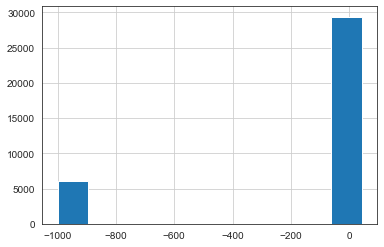

In [628]:
# przyglądamy się zmiennej years_employed
df.years_employed.hist()

In [629]:
# sprawdzamy wartości mniejsze od 0
df.years_employed[df.years_employed<0].describe()
    # wszystkie mają wartość -1000 -> możliwe, że tak zostały oznaczone np. osoby będące na emeryturze albo
    # nieposiadające pracy

count    6098.0
mean    -1000.0
std         0.0
min     -1000.0
25%     -1000.0
50%     -1000.0
75%     -1000.0
max     -1000.0
Name: years_employed, dtype: float64

In [630]:
df2.describe().round()

,id,months_balance,status
count,45985.0,45985.0,45985.0
mean,5070164.0,26.0,0.0
std,45434.0,16.0,0.0
min,5001711.0,0.0,0.0
25%,5026147.0,12.0,0.0
50%,5065737.0,25.0,0.0
75%,5114024.0,40.0,0.0
max,5150487.0,60.0,1.0


In [631]:
# definiowanie zmiennych nominalnych
df[['code_gender', 'name_income_type', 
    'name_family_status', 
    'name_housing_type']] = df[['code_gender', 'name_income_type', 
                                'name_family_status',
                                'name_housing_type']].astype('category')

In [632]:
# zmienne porządkowe
df.groupby('name_education_type').mean()
    # utworzenie zmiennej typu category o charakterze porządkowym
edu = CategoricalDtype(categories=['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 
                                   'Higher education', 'Academic degree'], ordered=True)
df['name_education_type'] = df['name_education_type'].astype(edu)

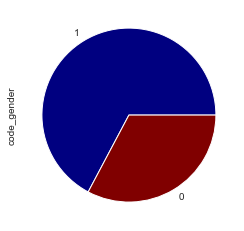

In [633]:
# PŁEĆ
df.code_gender.value_counts().plot(kind='pie', colors=['navy', 'maroon'])

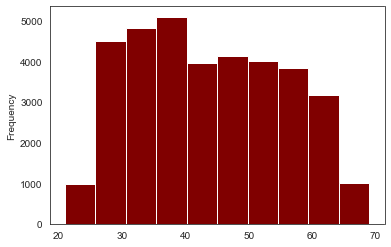

In [679]:
# WIEK
df.age.plot.hist(color='maroon')

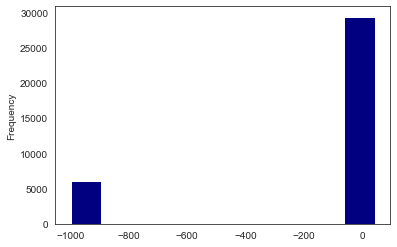

In [635]:
# STAŻ PRACY
df.years_employed.plot.hist(color='navy')

In [636]:
# LICZBA DZIECI
df.cnt_children.plot.bar(color='maroon')

Error in callback <function flush_figures at 0x1130e1670> (for post_execute):


KeyboardInterrupt: 

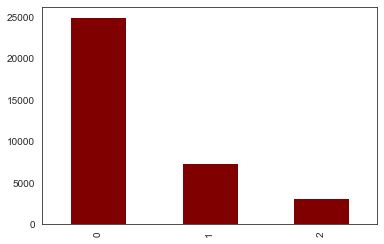

In [637]:
# Liczba dzieci jako kategoria
df['children_cat'] = df['cnt_children']
df.groupby('children_cat').mean()
    # utworzenie zmiennej typu category o charakterze porządkowym
child = CategoricalDtype(categories=df.cnt_children.unique(), ordered=False)
df['children_cat'] = df['children_cat'].astype(child)
df['children_cat'].value_counts().plot(kind='bar', color=['maroon'])

df.drop('children_cat', axis='columns', inplace=True)

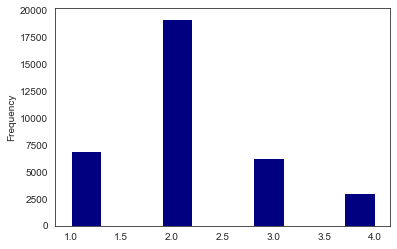

In [638]:
# LICZBA CZŁONKÓW RODZINY
df.cnt_fam_members.plot.hist(color='navy')

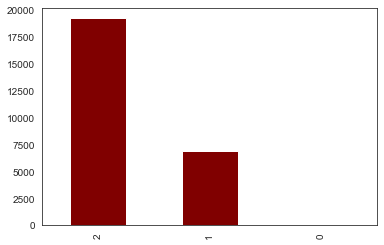

In [639]:
# Liczba członków rodziny jako kategoria
df['fam_mem'] = df['cnt_fam_members']
df.groupby('fam_mem').mean()
    # utworzenie zmiennej typu category o charakterze porządkowym
fam_mem = CategoricalDtype(categories=df.cnt_fam_members.unique(), ordered=False)
df['fam_mem'] = df['fam_mem'].astype(child)
df['fam_mem'].value_counts().plot(kind='bar', color=['maroon'])

df.drop('fam_mem', axis='columns', inplace=True)

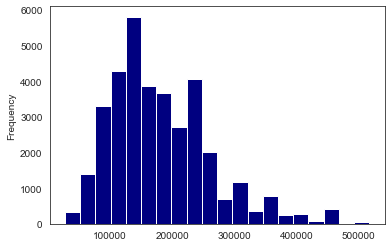

In [640]:
# PRZYCHÓD
df.amt_income_total.plot.hist(color='navy', bins=20)

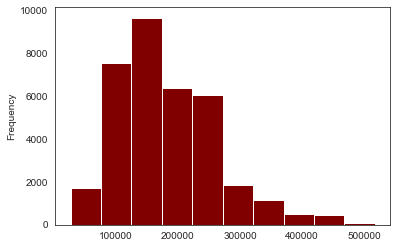

In [641]:
# histogram dla wartości poniżej 1 mln
df.amt_income_total.plot.hist(color='maroon')

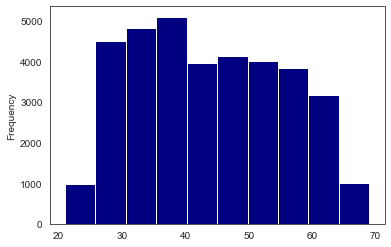

In [642]:
# WIEK
df.age.plot.hist(color='navy')

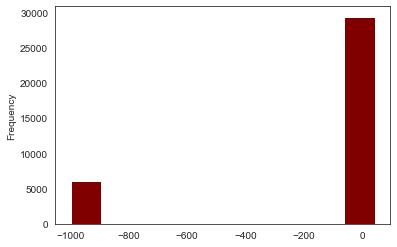

In [643]:
# STAŻ PRACY
df.years_employed.plot.hist(color='maroon')

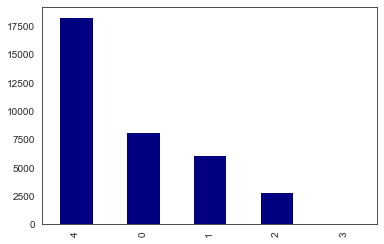

In [644]:
# STATUS ZAWODOWY
df['name_income_type'].value_counts().plot(kind='bar', color=['navy'])

In [645]:
# Sprawdzamy liczebność kategorii
df.name_income_type.value_counts()
    # Pensioner stanowi zaledwie 136 na 304354 obserwacji
    # Studentów było jedynie 12

4    18304
0     8178
1     6114
2     2886
3       11
Name: name_income_type, dtype: int64

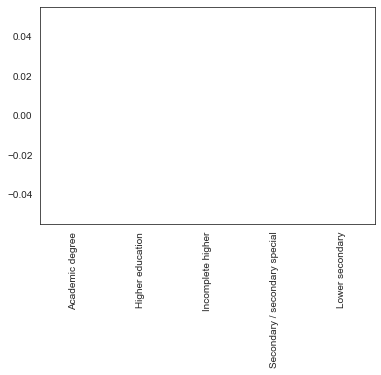

In [646]:
# WYKSZTAŁCENIE
df['name_education_type'].value_counts().plot(kind='bar', color=['maroon'])

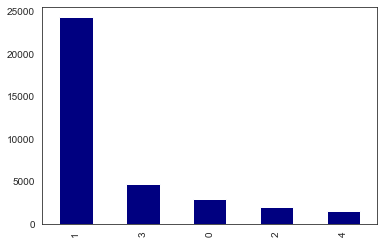

In [647]:
# STATUS CYWILNY
df['name_family_status'].value_counts().plot(kind='bar', color=['navy'])

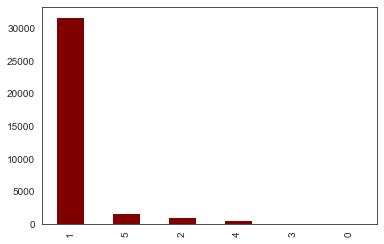

In [648]:
# RODZAJ DOMU (?)
df['name_housing_type'].value_counts().plot(kind='bar', color=['maroon'])

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35493 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   35493 non-null  int64   
 1   code_gender          35493 non-null  category
 2   flag_own_car         35493 non-null  int64   
 3   flag_own_realty      35493 non-null  int64   
 4   cnt_children         35493 non-null  int64   
 5   amt_income_total     35493 non-null  int64   
 6   name_income_type     35493 non-null  category
 7   name_education_type  0 non-null      category
 8   name_family_status   35493 non-null  category
 9   name_housing_type    35493 non-null  category
 10  flag_work_phone      35493 non-null  int64   
 11  flag_phone           35493 non-null  int64   
 12  flag_email           35493 non-null  int64   
 13  cnt_fam_members      35493 non-null  int64   
 14  age                  35493 non-null  int64   
 15  years_employed    

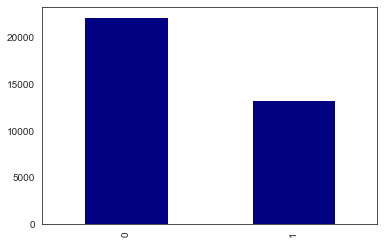

In [650]:
# PRYWATNY SAMOCHÓD
df['flag_own_car'].value_counts().plot(kind='bar', color=['navy'])

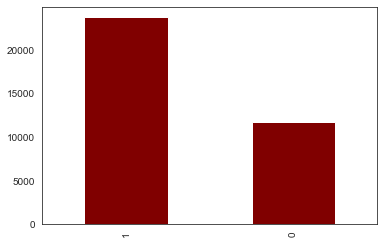

In [651]:
# WŁASNA NIERUCHOMOŚĆ
df['flag_own_realty'].value_counts().plot(kind='bar', color=['maroon'])

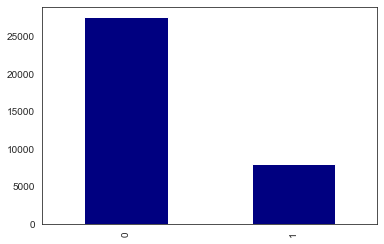

In [652]:
# TELEFON SŁUŻBOWY
df['flag_work_phone'].value_counts().plot(kind='bar', color=['navy'])

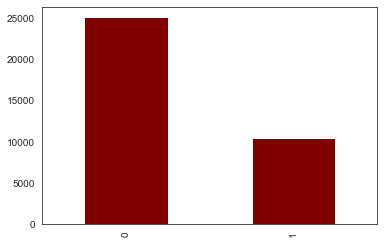

In [653]:
# TELEFON
df['flag_phone'].value_counts().plot(kind='bar', color=['maroon'])

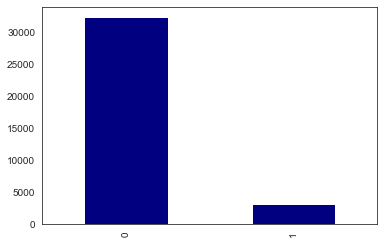

In [654]:
# E-MAIL
df['flag_email'].value_counts().plot(kind='bar', color=['navy'])

# Modelowanie

In [655]:
# sprawdzamy liczebnośź grup "dobry/zły" klient
df.status.value_counts(normalize=True) 
    # występuje oversampling - grupa 0 stanowi 98% obserwacji

0    0.983208
1    0.016792
Name: status, dtype: float64

In [656]:
# X = wszystkie wartości bez statusu
X = df.iloc[:,1:-1] 
# y = tylko status
Y = df.iloc[:,-1] 

In [657]:
# normalizacja danych typu min-max
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [658]:
# eliminacja oversamplingu - SMOTE
#oversample = SMOTE()
#X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
#X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [659]:
# SMOTE 1
#Y = Y.astype('int')
#X_balance,Y_balance = SMOTE().fit_sample(X,Y)
#X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [660]:
# odsetek wartości 0-1 po zastosowaniu SMOTE

In [661]:
# y_train przed
#y_train.value_counts(normalize=True)

In [662]:
# y_train po
#y_balanced.value_counts(normalize=True)

In [663]:
# y_test przed
#y_test.value_counts(normalize=True)

In [664]:
# y_test po
#y_balanced.value_counts(normalize=True)

In [665]:
# tworzymy podział na zbiór treningowy (70%) i testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, 
                                                    stratify=y_balanced, test_size=0.3,
                                                    random_state = 10086)

In [666]:
# tworzymy podział na zbiór treningowy (70%) i testowy (30%)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Model regresji logistycznej

In [667]:
model1 = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)


In [668]:
# zastosowanie modelu na zbiorze testowym
#X_test_sm = sm.add_constant(X_test)
y_test_pred = model1.predict(X_test)

In [669]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['id'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,status,id,0
0,0,28915,0
1,1,19297,1
2,1,12641,0
3,1,28654,1
4,0,29097,0


In [670]:
# zmieniamy nazwę kolumny '0' na 'predicted_status'
y_pred_final= y_pred_final.rename(columns={0 : 'predicted_status'})

In [671]:
# zmieniamy kolejność kolumn w tabeli
y_pred_final = y_pred_final.reindex(['id','status','predicted_status'], axis=1)
y_pred_final.head()

,id,status,predicted_status
0,28915,0,0
1,19297,1,1
2,12641,1,0
3,28654,1,1
4,29097,0,0


In [672]:
#y_pred_final['predicted_status'] = y_pred_final.predicted_status.map(lambda x: 1 if x > 0.8 else 0)

In [673]:
# confusion matrix
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.7631
      0     1
0  5598  1731
1  1741  5587


In [674]:
# definiowanie zmiennych FalsePositive, TrueNegative etc.
TruePositive = confusionMatrix[1,1] 
TrueNegative = confusionMatrix[0,0] 
FalsePositive = confusionMatrix[0,1] 
FalseNegative = confusionMatrix[1,0] 

In [675]:
# sprawdzamy accuracy
metrics.accuracy_score(y_pred_final.status, y_pred_final.predicted_status)

0.763116599576994

In [676]:
# obliczamy sensitivity
sensitivity = TruePositive / (TruePositive + FalseNegative).astype(float)
sensitivity

0.7624181222707423

In [677]:
# obliczamy specificity
specificity = TrueNegative / (TrueNegative + FalsePositive).astype(float)
specificity

0.7638149815800246

In [678]:
# confusion matrix
sns.set_style('white') 
class_names = ['0','1']
cm = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(cm, X=y_test, y_true=y_predict,
                      labels= class_names, normalize = True) 
                        #title='Normalized Confusion Matrix: Logistic Regression')

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
def krzywa_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False)
    a_score = metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='krzywa ROC (pole powierzchni = %0.2f)' % a_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.target, 
                                         y_train_pred_final.target_Prob, 
                                         drop_intermediate = False )

In [ ]:
krzywa_roc(y_train_pred_final.target, y_train_pred_final.target_Prob)

# Drzewo decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# tworzymy drzewo decyzyjne
dec_tree = DecisionTreeClassifier()

In [ ]:
# fitting the model
dec_tree.fit(X_train,y_train)

In [ ]:
# testujemy na zbiorze testowym
y_pred = dec_tree.predict(X_test)

In [ ]:
# obliczamy accuracy
accuracy1 = metrics.accuracy_score(y_test,y_pred)
accuracy1

In [ ]:
# tworzymy confusion matrix
confusion_matrix(y_test,y_pred)

In [ ]:
# metryki do oceny modelu
print(classification_report(y_test,y_pred))

In [ ]:
# obliczamy liczbę węzłów w drzewie
dec_tree.tree_.node_count

In [ ]:
# drzewo z max długością = 10
dec_tree = DecisionTreeClassifier(max_depth=10)
dec_tree.fit(X_train,y_train)

In [ ]:
y_pred = dec_tree.predict(X_test)

In [ ]:
accuracy1 = metrics.accuracy_score(y_test,y_pred)
accuracy1
# accuracy niższe o 9 pkt. proc.

In [ ]:
confusion_matrix(y_test,y_pred)

# Las losowy

In [ ]:
Random_F1 = RandomForestClassifier()
# n_estimators - domyślnie 100, liczba drzew w lesie
# max_depth - max długość drzewa
# min_samples_leaf - 
Random_F1.fit(X_train, y_train)
y_pred = Random_F1.predict(X_test)

In [ ]:
# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

In [ ]:
# Obliczamy accuracy
print('Accuracy = {:.4}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
# regularyzacja (L1, L2, przycinanie)

In [ ]:
# model ze zmienionymi parametrami (parametry do zmiany)
Random_F1 = RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_leaf=16)
# n_estimators - domyślnie 100, liczba drzew w lesie
# max_depth - max długość drzewa
# min_samples_leaf - 
Random_F1.fit(X_train, y_train)
y_pred = Random_F1.predict(X_test)

In [ ]:
# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

In [ ]:
# Obliczamy accuracy
print('Accuracy = {:.4}'.format(accuracy_score(y_test, y_pred)))
    # niższe o 7 pkt. proc.

In [ ]:
# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      labels=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Ramdom Forests')